In [1]:
import os
import numpy as np
import tensorflow as tf
import tensorflow.keras.backend as k
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import History
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras
from tensorflow.python.keras.optimizers import TFOptimizer
from tensorflow.keras import backend as K
import math
import matplotlib.pyplot as plt
import random



In [2]:
#change current directory up to parent, only run 1 time!
os.chdir("..")

In [3]:
def load_data(test=False,Print=False,path=f'{os.path.abspath(os.curdir)}/data/carseg_data/clean_data',nr_img=1498):
    train_data_input=[]
    train_data_target=[]
    
    for n in range(nr_img):
        n1=n
        if test:
            n1=f'{n}_a'
        try:
            test1=np.load(f'{path}/{n1}.npy')
            inputs=test1[:3].transpose()/255
            inputs=tf.convert_to_tensor(inputs)
            #inputs=inputs[tf.newaxis,...]
            target=test1[3].transpose()
            target=tf.convert_to_tensor(target)
            target=target[...,tf.newaxis]
            #target=target[tf.newaxis,...]

            
            train_data_input.append(inputs)
            train_data_target.append(target)
        except:
            if Print:
                print(f'fil nr {n} mangeler')
    return [train_data_input,train_data_target]

In [4]:
test_data=load_data(test=True)
train_data=load_data()

In [5]:
def Get_stats(data):
    print(f'Number of training img {len(data[0])}')
    print(f'target sahpe {data[1][0].shape}')
    print(f'input shape {data[0][0].shape}')

print('test_data:')
Get_stats(test_data)
print('train_data:')
Get_stats(train_data)

test_data:
Number of training img 99
target sahpe (256, 256, 1)
input shape (256, 256, 3)
train_data:
Number of training img 1128
target sahpe (256, 256, 1)
input shape (256, 256, 3)


In [6]:
depth = 8
test_data2=tf.one_hot(test_data[1], depth)[:,:,:,0,:]
train_data2=tf.one_hot(train_data[1], depth)[:,:,:,0,:]

In [7]:
test_data[1]=test_data2
train_data[1]=train_data2

In [8]:
print('test_data:')
Get_stats(test_data)
print('train_data:')
Get_stats(train_data)

test_data:
Number of training img 99
target sahpe (256, 256, 8)
input shape (256, 256, 3)
train_data:
Number of training img 1128
target sahpe (256, 256, 8)
input shape (256, 256, 3)


In [17]:
leakyrelu_alpha = 0.3
dr_rate = 0.6
def unet(pretrained_weights=None, input_size=(256, 256, 3)):
    inputs = Input(input_size)
    conv1 = Conv2D(64, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = BatchNormalization()(conv1)
    conv1 = LeakyReLU(alpha=leakyrelu_alpha)(conv1)
    #conv1 = Dropout(dr_rate)(conv1) ###
    conv1 = Conv2D(64, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv1)
    conv1 = BatchNormalization()(conv1)    
    conv1 = LeakyReLU(alpha=leakyrelu_alpha)(conv1)
    #conv1 = Dropout(dr_rate)(conv1) ###
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    #pool1 = Dropout(dr_rate)(pool1) ### 
    
    conv2 = Conv2D(128, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = BatchNormalization()(conv2)
    conv2 = LeakyReLU(alpha=leakyrelu_alpha)(conv2)
    #conv2 = Dropout(dr_rate)(conv2)###
    conv2 = Conv2D(128, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv2)
    conv2 = BatchNormalization()(conv2)
    conv2 = LeakyReLU(alpha=leakyrelu_alpha)(conv2)    
    #conv2 = Dropout(dr_rate)(conv2)###    
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = Conv2D(256, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = BatchNormalization()(conv3)
    conv3 = LeakyReLU(alpha=leakyrelu_alpha)(conv3)
    #conv3 = Dropout(dr_rate)(conv3) ###
    conv3 = Conv2D(256, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv3)
    conv3 = BatchNormalization()(conv3)
    conv3 = LeakyReLU(alpha=leakyrelu_alpha)(conv3)
    #conv3 = Dropout(dr_rate)(conv3) ###
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = Conv2D(512, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = BatchNormalization()(conv4)
    conv4 = LeakyReLU(alpha=leakyrelu_alpha)(conv4)    
    #conv4 = Dropout(dr_rate)(conv4) ###
    conv4 = Conv2D(512, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv4)
    conv4 = BatchNormalization()(conv4)
    conv4 = LeakyReLU(alpha=leakyrelu_alpha)(conv4)
    drop4 = Dropout(dr_rate)(conv4) ###
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)    

    conv5 = Conv2D(1024, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = BatchNormalization()(conv5)    
    conv5 = LeakyReLU(alpha=leakyrelu_alpha)(conv5)
    #conv5 = Dropout(dr_rate)(conv5) ###
    conv5 = Conv2D(1024, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv5)
    conv5 = BatchNormalization()(conv5)
    drop5 = LeakyReLU(alpha=leakyrelu_alpha)(conv5)
    #drop5 = Dropout(dr_rate)(conv5) ###

    up6 = Conv2D(512, 2, activation = None, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    up6 = LeakyReLU(alpha=leakyrelu_alpha)(up6)
    merge6 = concatenate([drop4,up6], axis = 3)
    conv6 = Conv2D(512, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = BatchNormalization()(conv6)
    conv6 = LeakyReLU(alpha=leakyrelu_alpha)(conv6)
    #conv6 = Dropout(dr_rate)(conv6) ###
    conv6 = Conv2D(512, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv6)
    conv6 = BatchNormalization()(conv6)
    conv6 = LeakyReLU(alpha=leakyrelu_alpha)(conv6)    
    #conv6 = Dropout(dr_rate)(conv6) ###   

    up7 = Conv2D(256, 2, activation = None, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    up7 = BatchNormalization()(up7)    
    up7 = LeakyReLU(alpha=leakyrelu_alpha)(up7)
    up7 = Dropout(dr_rate)(up7) ###
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = BatchNormalization()(conv7)    
    conv7 = LeakyReLU(alpha=leakyrelu_alpha)(conv7)    
    #conv7 = Dropout(dr_rate)(conv7) ###
    conv7 = Conv2D(256, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv7)
    conv7 = BatchNormalization()(conv7)
    conv7 = LeakyReLU(alpha=leakyrelu_alpha)(conv7)
    #conv7 = Dropout(dr_rate)(conv7) ###   

    up8 = Conv2D(128, 2, activation = None, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    up8 = BatchNormalization()(up8)
    up8 = LeakyReLU(alpha=0.3)(up8)
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = BatchNormalization()(conv8)
    conv8 = LeakyReLU(alpha=0.3)(conv8)
    #conv8 = Dropout(dr_rate)(conv8) ###
    conv8 = Conv2D(128, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = BatchNormalization()(conv8)    
    conv8 = LeakyReLU(alpha=0.3)(conv8)    
    #conv8 = Dropout(dr_rate)(conv8) ###    

    up9 = Conv2D(64, 2, activation = None, padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    up9 = BatchNormalization()(up9)
    up9 = LeakyReLU(alpha=leakyrelu_alpha)(up9)
    up9 = Dropout(dr_rate)(up9) ###
    merge9 = concatenate([conv1,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = BatchNormalization()(conv9)
    conv9 = LeakyReLU(alpha=leakyrelu_alpha)(conv9)    
    #conv9 = Dropout(dr_rate)(conv9) ###
    conv9 = Conv2D(64, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)    
    conv9 = LeakyReLU(alpha=leakyrelu_alpha)(conv9)    
    #conv9 = Dropout(dr_rate)(conv9) ###
    conv9 = Conv2D(2, 3, activation = None, padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = BatchNormalization()(conv9)
    conv9 = LeakyReLU(alpha=leakyrelu_alpha)(conv9)    
    #conv9 = Dropout(dr_rate)(conv9) ###
    conv10 = Conv2D(8, 1, activation='softmax')(conv9)

    model = Model(inputs=inputs, outputs=conv10)

    def compute_loss(y, y_pred):
        y_true_f = K.flatten(y)
        y_pred_f = K.flatten(y_pred)
        intersection = K.sum(y_true_f * y_pred_f)
        dice = (2. * intersection ) / (K.sum(y_true_f) + K.sum(y_pred_f))
        return -dice

    model.compile(optimizer=Adam(lr=1e-2), loss=compute_loss, metrics=['accuracy'])

    if (pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

model = unet()
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_72 (Conv2D)             (None, 256, 256, 64  1792        ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_66 (BatchN  (None, 256, 256, 64  256        ['conv2d_72[0][0]']              
 ormalization)                  )                                                           

                                )                                                                 
                                                                                                  
 batch_normalization_74 (BatchN  (None, 16, 16, 1024  4096       ['conv2d_80[0][0]']              
 ormalization)                  )                                                                 
                                                                                                  
 leaky_re_lu_77 (LeakyReLU)     (None, 16, 16, 1024  0           ['batch_normalization_74[0][0]'] 
                                )                                                                 
                                                                                                  
 conv2d_81 (Conv2D)             (None, 16, 16, 1024  9438208     ['leaky_re_lu_77[0][0]']         
                                )                                                                 
          

                                                                                                  
 concatenate_14 (Concatenate)   (None, 128, 128, 25  0           ['leaky_re_lu_72[0][0]',         
                                6)                                'leaky_re_lu_85[0][0]']         
                                                                                                  
 conv2d_89 (Conv2D)             (None, 128, 128, 12  295040      ['concatenate_14[0][0]']         
                                8)                                                                
                                                                                                  
 batch_normalization_82 (BatchN  (None, 128, 128, 12  512        ['conv2d_89[0][0]']              
 ormalization)                  8)                                                                
                                                                                                  
 leaky_re_

In [18]:
class testgenerator(Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        #idx=random.randint(0,len(self.x)-1-batch_size)
        batch_x = self.x[idx * self.batch_size:(idx + 1) *
        self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) *
        self.batch_size]

        return np.array(batch_x),np.array(batch_y)

In [19]:
batch_size=8
train_data_gen = testgenerator(train_data[0],train_data[1],batch_size)
print(train_data[1])
#val_data_gen = testgenerator(test_data[0][0],test_data[1][0],1)

tf.Tensor(
[[[[1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  ...

  [[1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]]

  [[1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0. ... 0. 0. 0.]
   ...
   [1. 0. 0. ... 0. 0. 0.]
   [1. 0. 0.

In [40]:
history = model.fit_generator(train_data_gen, epochs=100,steps_per_epoch=52)#, steps_per_epoch=5

Epoch 1/100


C:\Users\mikke\AppData\Local\Temp/ipykernel_16920/798738366.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen, epochs=100,steps_per_epoch=52)#, steps_per_epoch=5


 1/52 [..............................] - ETA: 9:08 - loss: -0.9160 - accuracy: 0.9217

KeyboardInterrupt: 

In [24]:
print(test_data[0][0])

tf.Tensor(
[[[0.00318339 0.00324491 0.00338331]
  [0.00318339 0.00324491 0.00338331]
  [0.00322953 0.00329104 0.00342945]
  ...
  [0.00104575 0.00104575 0.00052288]
  [0.00106113 0.00106113 0.0005075 ]
  [0.00110727 0.00106113 0.00052288]]

 [[0.00316801 0.00324491 0.00333718]
  [0.00318339 0.00324491 0.00338331]
  [0.00321415 0.00327566 0.00341407]
  ...
  [0.00106113 0.00106113 0.00053825]
  [0.00106113 0.00106113 0.00053825]
  [0.00107651 0.00107651 0.00055363]]

 [[0.00315263 0.00322953 0.0033218 ]
  [0.00316801 0.00324491 0.00333718]
  [0.00319877 0.00327566 0.00336794]
  ...
  [0.00106113 0.00106113 0.00053825]
  [0.00106113 0.00104575 0.00056901]
  [0.00107651 0.00106113 0.00058439]]

 ...

 [[0.00156863 0.00181469 0.00219915]
  [0.00156863 0.00181469 0.00219915]
  [0.00156863 0.00181469 0.00219915]
  ...
  [0.00084583 0.00096886 0.00024606]
  [0.00084583 0.00096886 0.00024606]
  [0.00086121 0.00098424 0.00026144]]

 [[0.00156863 0.00181469 0.00219915]
  [0.00156863 0.00181469 0

In [37]:
def dise(y, y_pred):
        y_true_f = K.flatten(y)
        y_pred_f = K.flatten(y_pred)
        intersection = K.sum(y_true_f * y_pred_f)
        dice = (2. * intersection ) / (K.sum(y_true_f) + K.sum(y_pred_f))
        return -dice

In [32]:
result = model.predict(train_data[0][0][tf.newaxis,...])

1/1 [==============================] - 0s 426ms/step


In [39]:

print(dise(result,train_data[1][0]))

(256, 256, 8)
tf.Tensor(-0.006184286, shape=(), dtype=float32)


In [33]:
print(result.shape)

(1, 256, 256, 8)


In [34]:
print(result)

[[[[0.0000000e+00 9.6326903e-18 9.9864739e-01 ... 7.3124300e-14
    6.1176657e-08 1.1347090e-03]
   [0.0000000e+00 7.2573917e-27 9.9998236e-01 ... 5.1247641e-22
    3.0830956e-11 3.1661662e-06]
   [0.0000000e+00 1.7516231e-31 9.9999261e-01 ... 1.4342305e-26
    1.0896071e-12 6.8311799e-08]
   ...
   [9.5614946e-01 1.0834819e-02 3.4774290e-03 ... 7.5311367e-03
    5.8998493e-03 3.9005014e-03]
   [9.8070461e-01 5.3126896e-03 1.3474822e-03 ... 3.7707514e-03
    2.4315706e-03 1.6806055e-03]
   [9.9197769e-01 2.4909719e-03 4.6463890e-04 ... 1.6789521e-03
    9.4613113e-04 6.2113296e-04]]

  [[0.0000000e+00 1.1407429e-32 9.9999738e-01 ... 1.8414646e-25
    3.1699469e-14 2.5226891e-06]
   [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
    4.3242632e-21 5.1326700e-11]
   [0.0000000e+00 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
    2.5230385e-24 4.5828636e-14]
   ...
   [5.9858823e-01 6.2879749e-02 5.1605690e-02 ... 5.3783156e-02
    5.9017129e-02 4.8907042e-02]
   [9.0346855e

<function matplotlib.pyplot.show(close=None, block=None)>

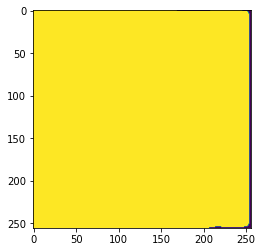

In [35]:
plt.imshow(tf.argmax(result[0],axis=-1))
plt.show